In [6]:
from AppalachianRL.envs.trail import AppalachianTrailEnv

env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()

   INVALID ACTION: No resupply point nearby.
Day 1: 2168.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
Day 2: 2152.0 miles left | Energy 82.4 | Food 9.0 | Weather 0
Day 3: 2152.0 miles left | Energy 100.0 | Food 8.5 | Weather 0
Day 4: 2140.0 miles left | Energy 88.0 | Food 7.7 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 5: 2130.0 miles left | Energy 100.0 | Food 7.7 | Weather 0
Day 6: 2114.0 miles left | Energy 73.6 | Food 6.7 | Weather 2
Day 7: 2099.0 miles left | Energy 57.1 | Food 5.7 | Weather 0
Day 8: 2088.0 miles left | Energy 46.1 | Food 4.9 | Weather 0
Day 9: 2079.0 miles left | Energy 32.6 | Food 4.1 | Weather 2
Day 10: 2061.0 miles left | Energy 8.8 | Food 3.1 | Weather 1
   FAILURE: You ran out of energy!
Day 11: 2038.0 miles left | Energy 0.0 | Food 1.9 | Weather 1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
from AppalachianRL.solvers.random import RandomAgent


# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
# env = AppalachianTrailEnv(seed=SEED)
env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED),
    "Random": RandomAgent(env, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()



Training Q-Learning...
Episode 50/500 | Reward: 167.2
Episode 100/500 | Reward: 211.6
Episode 150/500 | Reward: 104.1
Episode 200/500 | Reward: 47.8
Episode 250/500 | Reward: 37.1
Episode 300/500 | Reward: 135.5
Episode 350/500 | Reward: 23.4
Episode 400/500 | Reward: 92.5
Episode 450/500 | Reward: 125.1
Episode 500/500 | Reward: 108.5

Training SARSA...
Episode 50/500 | Reward: 17.8
Episode 100/500 | Reward: 70.1
Episode 150/500 | Reward: 126.4
Episode 200/500 | Reward: 65.0
Episode 250/500 | Reward: 28.9
Episode 300/500 | Reward: 166.8
Episode 350/500 | Reward: 147.6
Episode 400/500 | Reward: 49.8
Episode 450/500 | Reward: 138.8
Episode 500/500 | Reward: 54.9

Training Policy Gradient...
Episode 50/500 | Reward: 1619.0



Training Q-Learning...
Episode 50/500 | Reward: 78.5
Episode 100/500 | Reward: 21.7
Episode 150/500 | Reward: -85.8
Episode 200/500 | Reward: 137.0
Episode 250/500 | Reward: 188.2
Episode 300/500 | Reward: 92.2
Episode 350/500 | Reward: 108.8
Episode 400/500 | Reward: 54.6
Episode 450/500 | Reward: 178.0
Episode 500/500 | Reward: 45.5

Training SARSA...
Episode 50/500 | Reward: 95.7
Episode 100/500 | Reward: 31.8
Episode 150/500 | Reward: 60.1
Episode 200/500 | Reward: 137.0
Episode 250/500 | Reward: 71.6
Episode 300/500 | Reward: 78.4
Episode 350/500 | Reward: 25.4
Episode 400/500 | Reward: 96.3
Episode 450/500 | Reward: 8.1
Episode 500/500 | Reward: 111.2

Training Policy Gradient...
Episode 50/500 | Reward: -30.6
Episode 100/500 | Reward: -17.4
Episode 150/500 | Reward: -17.5
Episode 200/500 | Reward: 3.5
Episode 250/500 | Reward: -44.5
Episode 300/500 | Reward: 4.5
Episode 350/500 | Reward: -22.7
Episode 400/500 | Reward: -5.3
Episode 450/500 | Reward: -32.4
Episode 500/500 | Rewa

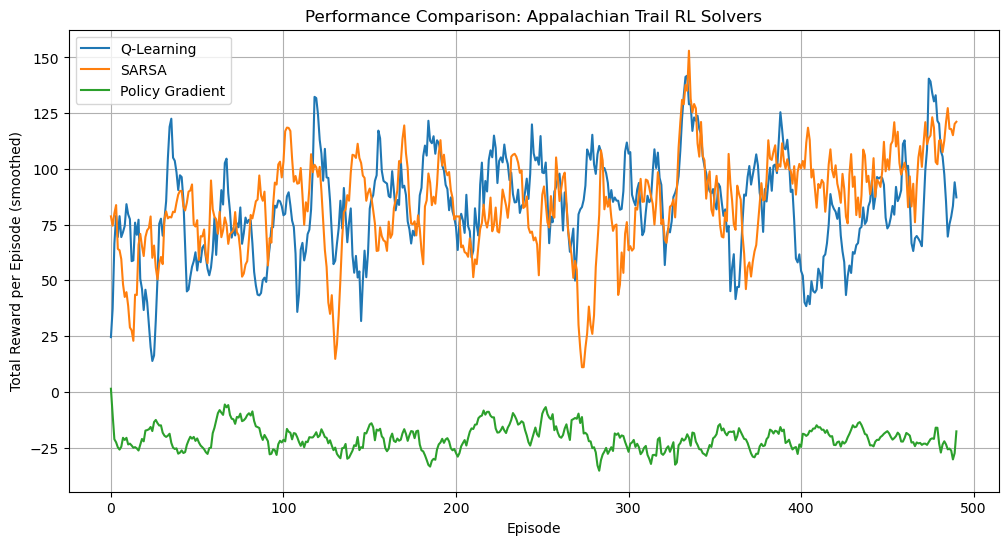

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver

# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()
